In [1]:
import numpy
import matplotlib.pyplot as plt
import linreg

In [2]:
# set a seed here to initialize the random number generator
# (such that we get the same dataset each time this cell is executed)
numpy.random.seed(2)

# note: using large values here might lead to numerical inaccuracies
order_range = range(2,16)

# let's generate some "non-linear" data; not
# that the sorting step is done for visualization
# purposes only (to plot the models as connected lines)
X = numpy.random.uniform(-10,10,80)
t = X**2 + numpy.random.random(80) * 25

# reshape both arrays to make sure that we deal with
# N-dimensional Numpy arrays
X = X.reshape((len(X),1))
t = t.reshape((len(t), 1))
print("Shape of our data matrix: %s" % str(X.shape))
print("Shape of our target vector: %s" % str(t.shape))

Shape of our data matrix: (80, 1)
Shape of our target vector: (80, 1)


In [3]:
def augment(X, max_order):
    """ Augments a given data
    matrix by adding additional 
    columns.
    
    NOTE: In case max_order is very large, 
    numerical inaccuracies might occur
    """
    
    X_augmented = X
    
    for i in range(2, max_order+1):
        X_augmented = numpy.concatenate([X_augmented, X**i], axis=1)
        
    return X_augmented

In [4]:
# let's split the dataset into a "training" and "validation" set
X_train = X[:len(X)//2]
X_train = X_train.reshape((len(X_train),1))
t_train = t[:len(t)//2]

X_val = X[len(X)//2:]
X_val = X_val.reshape((len(X_val),1))
t_val = t[len(t)//2:]

errors_train = []
errors_validation = []
for order in order_range:
    
    X_train_augmented = augment(X_train, order)
    X_val_augmented = augment(X_val, order)
    print("Shape of augmented data matrix: %s" % str(X_train_augmented.shape))
        
    # fit model on training set
    model = linreg.LinearRegression()
    model.fit(X_train_augmented, t_train)

    # get training predictions and error 
    preds_train = model.predict(X_train_augmented)
    error_train = ((preds_train - t_train)**2).mean()
    
    # get validation predictions and error
    preds_val = model.predict(X_val_augmented)
    error_val = ((preds_val - t_val)**2).mean()
    
    errors_train.append(error_train)
    errors_validation.append(error_val)

Shape of augmented data matrix: (40, 2)
Shape of augmented data matrix: (40, 3)
Shape of augmented data matrix: (40, 4)
Shape of augmented data matrix: (40, 5)
Shape of augmented data matrix: (40, 6)
Shape of augmented data matrix: (40, 7)
Shape of augmented data matrix: (40, 8)
Shape of augmented data matrix: (40, 9)
Shape of augmented data matrix: (40, 10)
Shape of augmented data matrix: (40, 11)
Shape of augmented data matrix: (40, 12)
Shape of augmented data matrix: (40, 13)
Shape of augmented data matrix: (40, 14)
Shape of augmented data matrix: (40, 15)


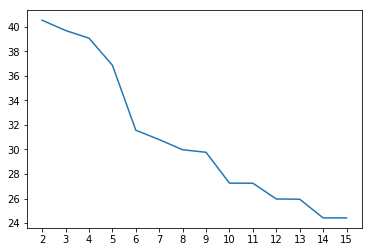

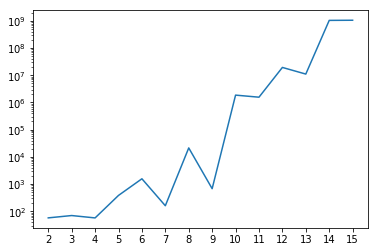

In [5]:
# training loss plot
plt.plot(order_range, errors_train)
plt.xticks(order_range)

# validation loss plot
plt.figure()
plt.xticks(order_range)
plt.plot(order_range, numpy.array(errors_validation))
# logscale for this plot since values are increasing rapidly!
plt.yscale("log", nonposy='clip')
plt.show()